In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import numpy as np
import random
from functools import reduce
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(10000, n_features = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, random_state = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7000, 2)
(3000, 2)
(7000,)
(3000,)


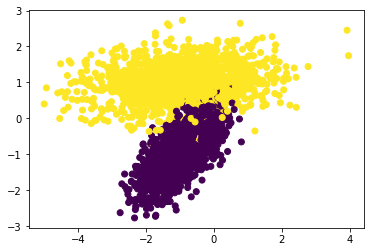

In [ ]:
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

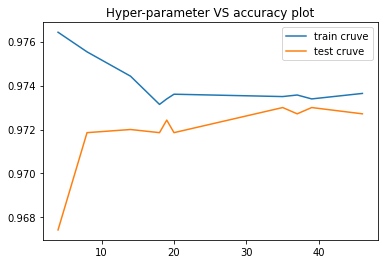

In [ ]:

def random_sample(l, folds):
  '''
    Input - l - Length of X_train
          - folds - The no of folds in K fold cross validation

    Output - train_indices, test_indices

    This function takes into the length of the X_train and the no of folds the X_train is to be divided.
    then it returns the train and test indices but assigning one fold as test and the rest as train.
    eg. fold =3 
        iter 1 : train = fold 2 + fold 3
                 test = fold 1
        iter 2 : train = fold 1 + fold 3
                 test = fold 2
        iter 3 : train = fold 1 + fold 2
                 test = fold 3

        returns train_indices = [iter1_train, iter2_train, iter3_train]
                test_indices = [iter1_test, iter2_test, iter3_test]

  '''
  samples = []
  values = set(range(0,l))
  for i in range(0, folds-1):
    temp = random.sample(values, int(l/folds))
    samples.append(temp)
    values = set(values) - set(temp) 

  samples.append(list(values))

  train_indices = []
  test_indices = []
  for i in range(0, folds):
    temp = samples.copy()
    test_indices.append(temp[i])
    del temp[i]
    train_indices.append(reduce(lambda a,b:a+b, temp))  


  return train_indices, test_indices
   

  

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  
    '''
      Input - 
      x_train: it is a numpy array of shape, (n,d)
      y_train: it is a numpy array of shape, (n,) or (n,1)
      classifier: it is KNeighborsClassifier()
      param_range: its a tuple like (a,b) a < b - range of values for K in KNN
      folds: an integer, represents number of folds we need to divide the data and test our model

      Outputs - 
      train_scores : The mean accuracy scores of train dataset over the no of folds
      test_scores : The mean accuracy scores of test dataset over the no of folds 
      hyper_k : The sorted array of randomly generated 10 K values for KNN.

    
    '''
    
    # 1. To generate 10 unique values(uniform random distribution) in the given range "param_range" and store them after sorting as "hyper_k" 
    # ex: if param_range = (1, 50), it will generate 10 random numbers in range 1 to 50

    hyper_k = sorted(np.random.choice(range(param_range[0], param_range[1]+1), size = 10, replace = False))

    # 2.divide numbers (indices) ranging from  0 to len(X_train) into groups = folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
    #     group 1: 0-33, group 2:34-66, group 3: 67-100

    # 3.for each hyperparameter hyper_k that we generated in step 1:
        # and using the above groups we have created in step 2 we will do cross-validation as follows

        # first we will keep group 2 + group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
        # test accuracies

        # second we will keep group 1 + group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
        # train and test accuracies

        # third we will keep group 1 + group 2 i.e. 0 - 66 as train data and group 3: 67-100 as test data, and find train and
        # test accuracies
        # based on the 'folds' value we will split the data into groups in above procedure accordingly.


    train_indices, test_indices = random_sample(len(x_train), folds)
    train_scores = []
    test_scores = []
    for k in hyper_k:
      train_scores_fold = []
      test_scores_fold = []
      for i in range(0, folds):

        X_train = x_train[train_indices[i]]
        Y_train = y_train[train_indices[i]]
        X_test = x_train[test_indices[i]]
        Y_test = y_train[test_indices[i]]

        clf.n_neighbors = k
        clf.fit(X_train, Y_train)

        Y_predicted = clf.predict(X_test)
        test_scores_fold.append(accuracy_score(Y_test, Y_predicted))

        Y_predicted = clf.predict(X_train)
        train_scores_fold.append(accuracy_score(Y_train, Y_predicted))

      # finding the mean of train accuracies across all the folds for a particular K values and store in a list "train_scores"
      # finding the mean of test accuracies across all the folds for a particular K values and store in a list "test_scores"

      train_scores.append(np.mean(np.array(train_scores_fold)))
      test_scores.append(np.mean(np.array(test_scores_fold)))

    return train_scores, test_scores, hyper_k

    


# 4. function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_score"
clf = KNeighborsClassifier()
param_range = (1,50)
folds = 5
train_score, cv_score, hyper_k = RandomSearchCV(X_train, y_train, clf, param_range, folds)

# 5. Now we will plot hyper-parameter vs accuracy plot and choose the best hyperparameter

''' for i in range(0, len(hyper_k)):
  print(hyper_k[i])
  print(train_score[i])
  print(cv_score[i])
'''

plt.plot(hyper_k, train_score, label='train cruve')
plt.plot(hyper_k, cv_score, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()



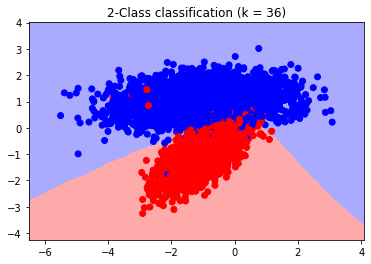

In [ ]:
# 7. Next we will plot the decision boundaries for the model initialized with the best hyperparameter


def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plotting the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()



from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 36)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)